In [1]:
import pandas as pd
import numpy as np

# importing selenium into code
from selenium import webdriver
from selenium.webdriver.support.select import Select
from msedge.selenium_tools import EdgeOptions
from msedge.selenium_tools import Edge

In [2]:
# initialize the options
options = EdgeOptions()
options.use_chromium = True
options.add_argument("--headless")
options.add_argument("disable-gpu")
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [3]:
# initialize the Edge web driver 
driver = webdriver.Chrome(executable_path=r"C:\Users\HP\Downloads\edgedriver_win64\msedgedriver.exe", options=options)

In [4]:
# define url
url ="https://agmarknet.gov.in/Default.aspx"
driver.get(url)

In [5]:
# create a object which contains the searchbox with id
# edit the content of the seatch box, filling it with "Selenium"


sel = Select (driver.find_element_by_id("ddlArrivalPrice"))
sel.select_by_value ('0')                                           # select value from drop-down column

In [6]:
sel = Select (driver.find_element_by_id("ddlCommodity"))
sel.select_by_value ('24')                                        # selecting Commodity as "Potato"

In [7]:
sel = Select (driver.find_element_by_id("ddlState"))
sel.select_by_value ('UP')                                       # selecting State as "Uttar Pradesh"


In [9]:
sel = Select (driver.find_element_by_id("ddlDistrict"))
sel.select_by_value ('1')                                         #selecting District as "Agra"

In [10]:
driver.find_element_by_id("txtDate").clear()                      # Clear the pre-filled value
driver.find_element_by_id("txtDate").send_keys('01-Jan-2020')   # enter the start Date as 1st Jan’2020

In [11]:
driver.find_element_by_id("txtDateTo").clear()                      # Clear the pre-filled value
driver.find_element_by_id("txtDateTo").send_keys('31-Dec-2020')    # enter the end Date as 31st Dec’2020

In [12]:
driver.find_element_by_id("btnGo").click()         # Click "Go" button to search the querry

In [13]:
# Click "ExportToExcel" button to download the complete data as Excel file
# Downloaded file will be saved at the browser's default location
# We can easily read it from there

driver.find_element_by_id("cphBody_ButtonExcel").click()

In [14]:
# close the webdriver
driver.quit() 

In [15]:
df = pd.read_excel("C://Users//HP//Downloads//Agmarknet_Price_Report.xls")

### Data Inspection

In [16]:
df.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26


In [17]:
df.shape

(1827, 10)

* __We have 1827 rows and 10 columns in Dataset.__

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sl no.                     1827 non-null   int64         
 1   District Name              1827 non-null   object        
 2   Market Name                1827 non-null   object        
 3   Commodity                  1827 non-null   object        
 4   Variety                    1827 non-null   object        
 5   Grade                      1827 non-null   object        
 6   Min Price (Rs./Quintal)    1827 non-null   int64         
 7   Max Price (Rs./Quintal)    1827 non-null   int64         
 8   Modal Price (Rs./Quintal)  1827 non-null   int64         
 9   Price Date                 1827 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 142.9+ KB


* __We do not have any missing values in Dataset.__
* __There are 4 numerical  features and 5 categorical features present in the Dataset.__

In [19]:
df.describe()

,Sl no.,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
count,1827.000000,1827.000000,1827.000000,1827.000000
mean,914.000000,1392.799672,1521.559934,1474.332239
std,527.553789,562.382569,577.775389,555.645961
min,1.000000,0.000000,0.000000,550.000000
25%,457.500000,1000.000000,1200.000000,1115.000000
50%,914.000000,1250.000000,1370.000000,1310.000000
75%,1370.500000,1690.000000,1810.000000,1780.000000
max,1827.000000,3750.000000,3850.000000,3800.000000


In [20]:
from datetime import datetime

In [21]:
df['Price_Date'] = pd.to_datetime(df['Price Date'])  #convert 'Price date' column into datetime datatype

In [22]:
# Extract day, month, year, quater, and day name from 'Price_Date' column
df['Price_Date_month'] = df['Price_Date'].dt.month
df['Price_Date_day'] = df['Price_Date'].dt.day 
df['Price_Date_year'] = df['Price_Date'].dt.year
df['Price_Date_quarter'] = df['Price_Date'].dt.quarter
df['Price_Date_day_week'] = df['Price_Date'].dt.day_name()

In [23]:
df.drop(['Price Date'], axis=1, inplace=True) # now we can safely drop 'Price Date' column

In [24]:
df.head(6)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price_Date,Price_Date_month,Price_Date_day,Price_Date_year,Price_Date_quarter,Price_Date_day_week
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30,12,30,2020,4,Wednesday
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29,12,29,2020,4,Tuesday
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28,12,28,2020,4,Monday
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27,12,27,2020,4,Sunday
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26,12,26,2020,4,Saturday
5,6,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-25,12,25,2020,4,Friday


In [25]:
# importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

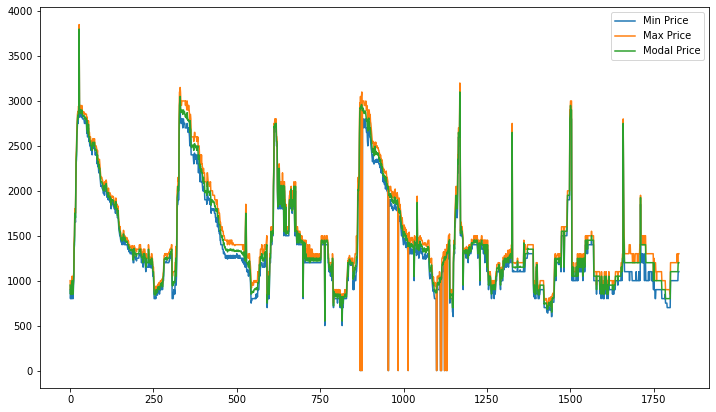

In [26]:
fig, ax = plt.subplots(figsize = (12,7))
ax = df['Min Price (Rs./Quintal)'].plot(label='Min Price')
ax = df['Max Price (Rs./Quintal)'].plot(label='Max Price')
ax = df['Modal Price (Rs./Quintal)'].plot(label='Modal Price')
ax.legend()

In [27]:
dfg= df.groupby('Market Name')

In [28]:
dfg.head(4)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price_Date,Price_Date_month,Price_Date_day,Price_Date_year,Price_Date_quarter,Price_Date_day_week
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30,12,30,2020,4,Wednesday
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29,12,29,2020,4,Tuesday
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28,12,28,2020,4,Monday
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27,12,27,2020,4,Sunday
306,307,Agra,Agra,Potato,Desi,FAQ,800,1100,960,2020-12-31,12,31,2020,4,Thursday
307,308,Agra,Agra,Potato,Desi,FAQ,800,1050,940,2020-12-30,12,30,2020,4,Wednesday
308,309,Agra,Agra,Potato,Desi,FAQ,800,1080,950,2020-12-29,12,29,2020,4,Tuesday
309,310,Agra,Agra,Potato,Desi,FAQ,800,1100,950,2020-12-28,12,28,2020,4,Monday
591,592,Agra,Fatehabad,Potato,Desi,FAQ,700,800,750,2020-12-31,12,31,2020,4,Thursday
592,593,Agra,Fatehabad,Potato,Desi,FAQ,800,900,850,2020-12-30,12,30,2020,4,Wednesday


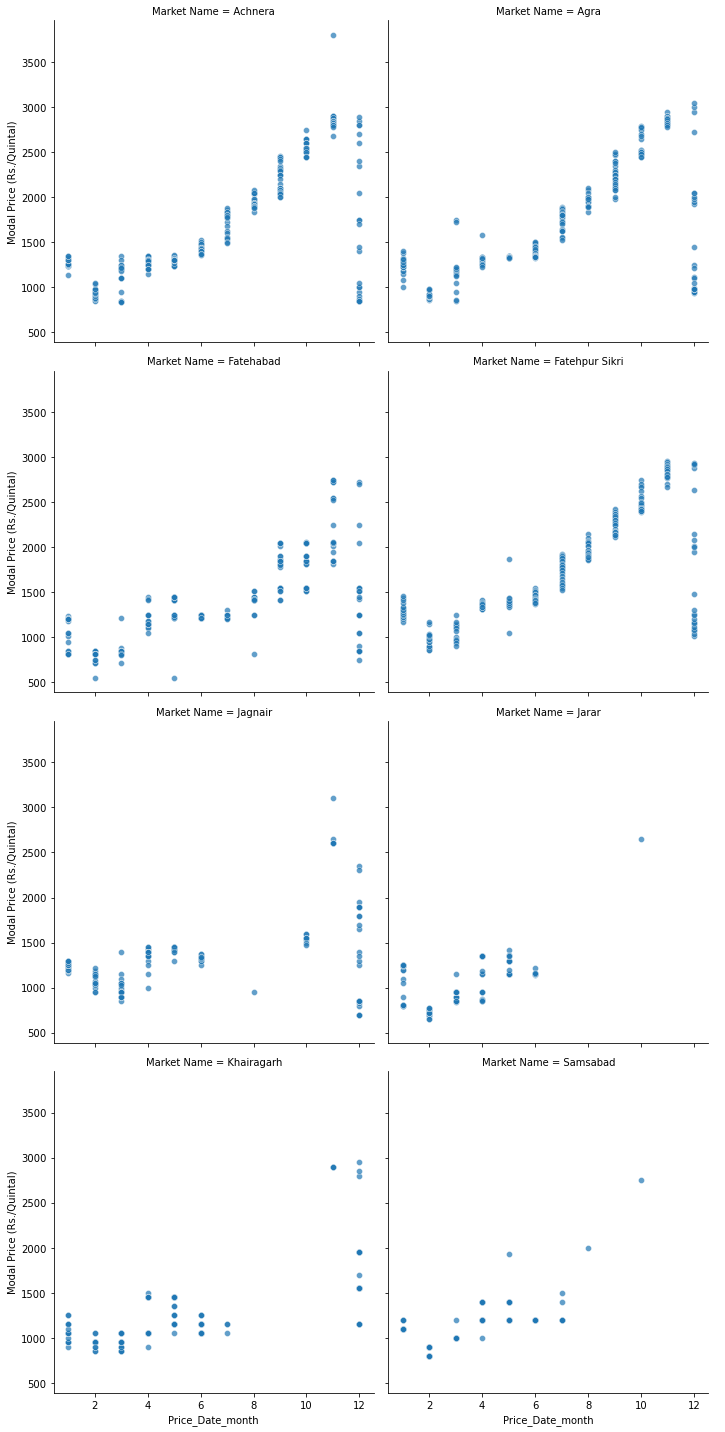

In [29]:
# plotting price per month according to each mrket in Agra
g= sns.FacetGrid(df, col="Market Name",height=5, col_wrap=2)
g.map(sns.scatterplot,"Price_Date_month", "Modal Price (Rs./Quintal)", alpha=.7)
g.add_legend()

<AxesSubplot:xlabel='Market Name', ylabel='count'>

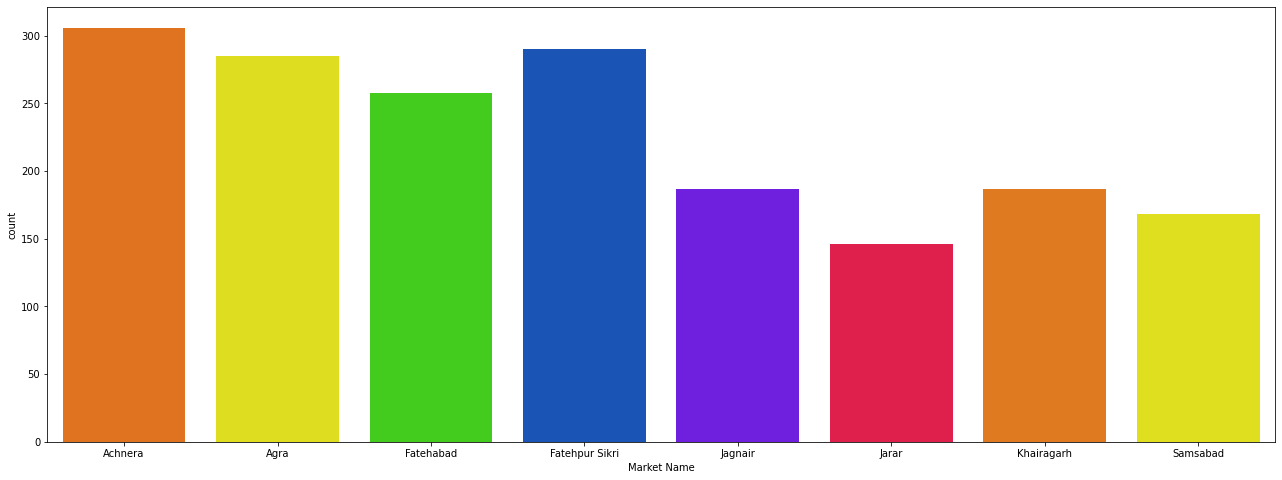

In [30]:
plt.figure(figsize=(22,8))
sns.countplot(x="Market Name",data=df,palette='prism')


__Achnera, Fatehpur Sikri  and  Agra  are some of the major markets in Agra District__

### Feature Engineering

In [31]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['District Name','Market Name','Commodity','Variety','Grade','Price_Date_day_week','Price_Date']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    
#One Hot Coding:
train = pd.get_dummies(df, columns=['District Name','Market Name','Commodity','Variety','Grade','Price_Date_day_week','Price_Date'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
train = train.select_dtypes(exclude='object')

In [35]:
# Seperate Features and Target
X= train.drop(columns = ['Modal Price (Rs./Quintal)'], axis=1)
y= train['Modal Price (Rs./Quintal)']

In [36]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

### Building Model

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [38]:
# Quick Comparison between a bunch of regressors

regressors = [DecisionTreeRegressor(),GradientBoostingRegressor(), RandomForestRegressor(),SVR()]

In [39]:
log_cols=["regressors", "scr"]
log = pd.DataFrame(columns=log_cols)

for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = rgr.predict(X_test)
    scor_train = rgr.score(X_train,y_train)
    scor_test = rgr.score(X_test,y_test)
    
    print('Train set accuracy: %f'%rgr.score(X_train,y_train))
    print('Test set accuracy: %f'%rgr.score(X_test,y_test))
    
    
    log_entry = pd.DataFrame([[name, scor_test]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

DecisionTreeRegressor
****Results****
Train set accuracy: 1.000000
Test set accuracy: 0.999513
GradientBoostingRegressor
****Results****
Train set accuracy: 0.999555
Test set accuracy: 0.965457
RandomForestRegressor
****Results****
Train set accuracy: 0.998019
Test set accuracy: 0.967807
SVR
****Results****
Train set accuracy: 0.248527
Test set accuracy: 0.207843


__Random Forest Regressor and Gradient Boosting Regressor both return almost same accuracy on train data but Random Forest model has slightly more accuracy. Decision Tree Regressor is likely to be Overfitting. That's why we will choose Random Forest Regressor as the final model.__

### Final Modeling

In [40]:
RF = RandomForestRegressor(n_estimators = 6,random_state = 4).fit(X_train,y_train)

In [41]:
print('Train set accuracy: %f'%RF.score(X_train,y_train))
print('Test set accuracy: %f'%RF.score(X_test,y_test))

Train set accuracy: 0.998920
Test set accuracy: 0.978580


__Random Forest Regressor returns 97% accuracy on the test set and 99% accuracy on the training set.__